In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("week2.csv")

In [3]:
df["Date"].dtype

dtype('O')

In [4]:
df.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Days,vwap,Day_Perc_Change,Trend
0,0,INFY,EQ,2017-05-15,964.25,963.5,963.50,949.10,953.25,951.55,...,3.471580e+09,75335,3052819,83.67,5,2017,15,75335.0,0.000000,Slight or No change
1,1,INFY,EQ,2017-05-16,951.55,953.1,960.15,946.95,956.00,955.00,...,2.920775e+09,71808,1858063,60.62,5,2017,16,71808.0,0.003626,Slight or No change
2,2,INFY,EQ,2017-05-17,955.00,951.6,958.45,943.85,952.90,952.80,...,1.384110e+09,75429,792251,54.35,5,2017,17,75429.0,-0.002304,Slight or No change
3,3,INFY,EQ,2017-05-18,952.80,943.0,973.90,942.85,960.25,961.75,...,3.878282e+09,120990,2309450,57.32,5,2017,18,120990.0,0.009393,Slight or No change
4,4,INFY,EQ,2017-05-19,961.75,961.5,962.70,947.85,957.40,957.95,...,2.031155e+09,88897,1457747,68.48,5,2017,19,88897.0,-0.003951,Slight or No change


In [5]:
df.drop(columns={"Unnamed: 0"},inplace=True)

In [6]:
df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Days,vwap,Day_Perc_Change,Trend
0,INFY,EQ,2017-05-15,964.25,963.50,963.50,949.10,953.25,951.55,951.49,...,3.471580e+09,75335,3052819,83.67,5,2017,15,75335.0,0.000000,Slight or No change
1,INFY,EQ,2017-05-16,951.55,953.10,960.15,946.95,956.00,955.00,952.92,...,2.920775e+09,71808,1858063,60.62,5,2017,16,71808.0,0.003626,Slight or No change
2,INFY,EQ,2017-05-17,955.00,951.60,958.45,943.85,952.90,952.80,949.48,...,1.384110e+09,75429,792251,54.35,5,2017,17,75429.0,-0.002304,Slight or No change
3,INFY,EQ,2017-05-18,952.80,943.00,973.90,942.85,960.25,961.75,962.61,...,3.878282e+09,120990,2309450,57.32,5,2017,18,120990.0,0.009393,Slight or No change
4,INFY,EQ,2017-05-19,961.75,961.50,962.70,947.85,957.40,957.95,954.18,...,2.031155e+09,88897,1457747,68.48,5,2017,19,88897.0,-0.003951,Slight or No change
5,INFY,EQ,2017-05-22,957.95,958.40,966.90,956.55,960.00,961.45,962.29,...,2.647755e+09,99616,2034031,73.92,5,2017,22,99616.0,0.003654,Slight or No change
6,INFY,EQ,2017-05-23,961.45,964.65,967.00,954.10,957.50,957.30,960.16,...,1.939515e+09,80122,1436389,71.11,5,2017,23,80122.0,-0.004316,Slight or No change
7,INFY,EQ,2017-05-24,957.30,960.00,965.50,949.60,957.00,954.80,958.37,...,2.700827e+09,56898,1913750,67.91,5,2017,24,56898.0,-0.002612,Slight or No change
8,INFY,EQ,2017-05-25,954.80,961.00,986.60,961.00,981.00,983.30,978.16,...,5.105250e+09,76160,4108984,78.73,5,2017,25,76160.0,0.029849,Slight or No change
9,INFY,EQ,2017-05-26,983.30,987.00,1000.00,980.60,996.05,995.70,994.06,...,2.479194e+09,63671,1477643,59.25,5,2017,26,63671.0,0.012611,Slight or No change


In [7]:
df1=df.set_index("Date")

In [8]:
df1.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Days,vwap,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,INFY,EQ,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,5,2017,15,75335.0,0.000000,Slight or No change
2017-05-16,INFY,EQ,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,5,2017,16,71808.0,0.003626,Slight or No change
2017-05-17,INFY,EQ,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,5,2017,17,75429.0,-0.002304,Slight or No change
2017-05-18,INFY,EQ,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,5,2017,18,120990.0,0.009393,Slight or No change
2017-05-19,INFY,EQ,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,5,2017,19,88897.0,-0.003951,Slight or No change


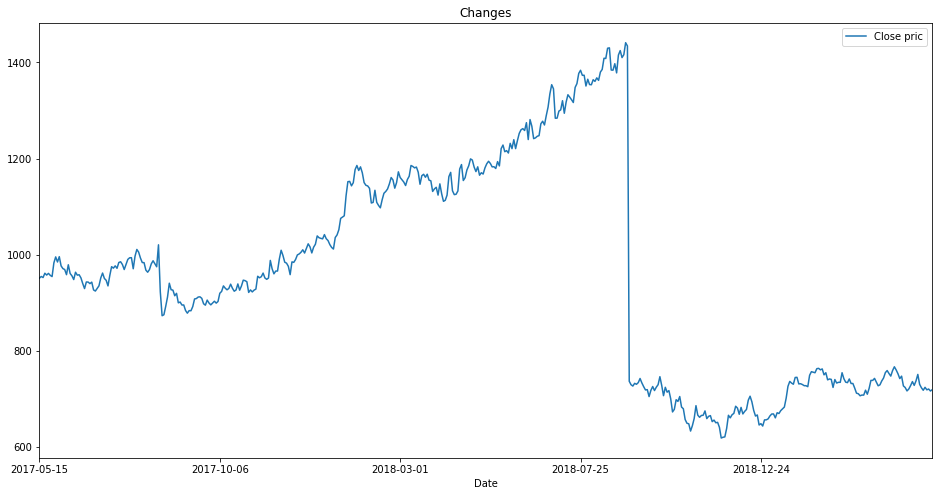

In [9]:
df1['Close Price'].plot(label='Close pric',figsize=(16,8),title='Changes')

plt.legend();

In [10]:
df1['Close Price'].argmax() #DAte on which drastic changes occur

'2018-08-31'

In [11]:
import pylab

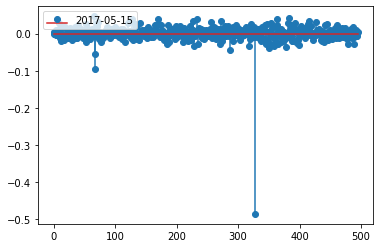

In [12]:
plt.stem(df1["Day_Perc_Change"],use_line_collection=True)
plt.legend(labels=df1.index, loc='upper left') 
plt.show()#stem plots

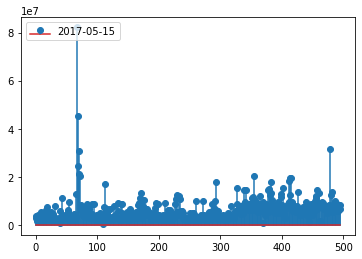

In [13]:
plt.stem(df1["Total Traded Quantity"])
plt.legend(labels=df1.index, loc='upper left') 
plt.show()

In [14]:
df2=df.groupby("Trend",axis=0).count()

In [15]:
df3=df1.groupby("Trend")

In [16]:
df2.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Days,vwap,Day_Perc_Change
Trend,,,,,,,,,,,,,,,,,,,,
Slight or No change,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496


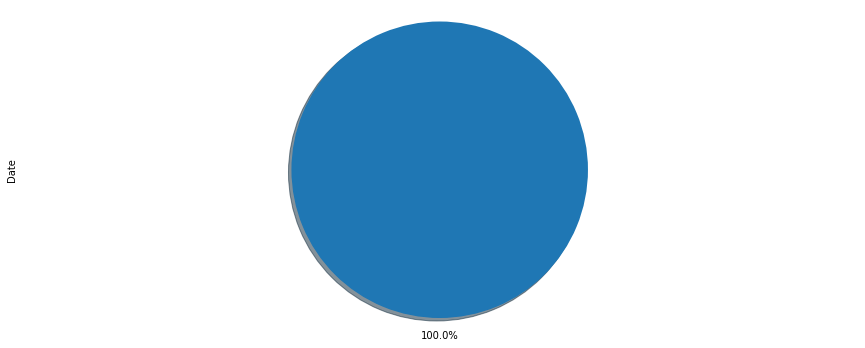

In [17]:
df2["Date"].plot(kind='pie',
                    figsize=(15, 6),
                    autopct='%1.1f%%', 
                    startangle=90,    
                     shadow=True,       
                     labels=None,         
                     pctdistance=1.12,
                 )    
                            
    
    
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()
    

In [18]:
attribut=df.head()

In [19]:
attribut

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Days,vwap,Day_Perc_Change,Trend
0,INFY,EQ,2017-05-15,964.25,963.5,963.50,949.10,953.25,951.55,951.49,...,3.471580e+09,75335,3052819,83.67,5,2017,15,75335.0,0.000000,Slight or No change
1,INFY,EQ,2017-05-16,951.55,953.1,960.15,946.95,956.00,955.00,952.92,...,2.920775e+09,71808,1858063,60.62,5,2017,16,71808.0,0.003626,Slight or No change
2,INFY,EQ,2017-05-17,955.00,951.6,958.45,943.85,952.90,952.80,949.48,...,1.384110e+09,75429,792251,54.35,5,2017,17,75429.0,-0.002304,Slight or No change
3,INFY,EQ,2017-05-18,952.80,943.0,973.90,942.85,960.25,961.75,962.61,...,3.878282e+09,120990,2309450,57.32,5,2017,18,120990.0,0.009393,Slight or No change
4,INFY,EQ,2017-05-19,961.75,961.5,962.70,947.85,957.40,957.95,954.18,...,2.031155e+09,88897,1457747,68.48,5,2017,19,88897.0,-0.003951,Slight or No change


In [21]:
plot1=df2[["Total Traded Quantity"]].median()

In [22]:
plot1

Total Traded Quantity    496.0
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

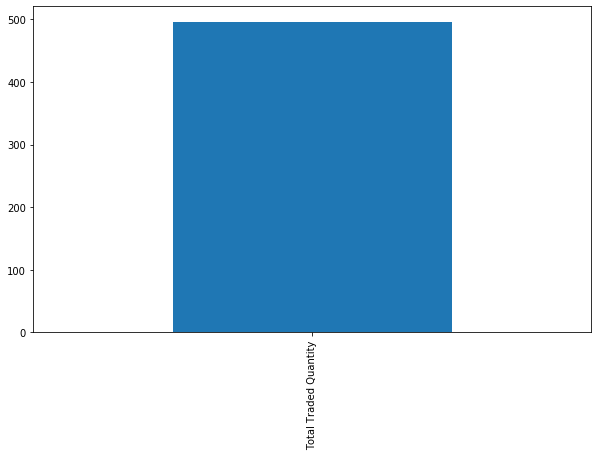

In [23]:
plot1.plot(kind='bar',figsize=(10,6))
plt.show

In [24]:
df["Day_Perc_Change"].head()

0    0.000000
1    0.003626
2   -0.002304
3    0.009393
4   -0.003951
Name: Day_Perc_Change, dtype: float64

In [25]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df["Day_Perc_Change"])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[  1   0   0   0   0   0   0   1 131 363]
[-0.486038   -0.43275311 -0.37946822 -0.32618333 -0.27289844 -0.21961354
 -0.16632865 -0.11304376 -0.05975887 -0.00647398  0.04681091]


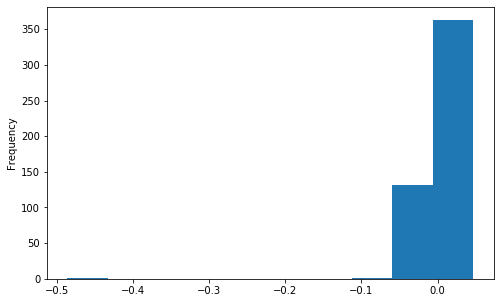

In [26]:
df["Day_Perc_Change"].plot(kind='hist', figsize=(8, 5))
plt.show()


In [28]:
from pandas.plotting import scatter_matrix

In [30]:
stc1=pd.read_csv("ASHOKA.csv")

In [31]:
stc2=pd.read_csv("BAJAJELEC.csv")

In [32]:
stc3=pd.read_csv("BOMDYEING.csv")

In [33]:
stc4=pd.read_csv("CENTURYPLY.csv")

In [390]:
stc5=pd.read_csv("FORTIS.csv")

In [134]:
stcc=[stc1["Close Price"],stc2["Close Price"],stc3["Close Price"],stc4["Close Price"],stc5["Close Price"]]

In [135]:
stcc=pd.DataFrame(stcc)

In [136]:
stcc

,0,1,2,3,4,5,6,7,8,9,...,485,486,487,488,489,490,491,492,493,494
Close Price,216.05,214.9,217.00,209.65,206.25,201.60,197.65,196.00,199.55,199.90,...,124.20,120.70,119.25,116.05,118.10,115.45,115.30,117.45,117.15,NaN
Close Price,341.15,347.0,349.85,334.10,336.20,313.25,315.55,327.95,346.20,359.45,...,571.85,565.50,559.50,557.85,557.75,534.45,531.85,540.90,541.55,NaN
Close Price,82.20,83.4,82.25,78.95,77.15,74.00,70.45,66.95,69.85,73.00,...,112.55,120.30,126.85,129.90,121.45,119.35,117.75,117.05,109.85,NaN
Close Price,266.65,266.1,264.85,260.35,254.05,255.50,247.95,241.05,252.65,259.65,...,173.35,164.90,168.75,168.95,163.15,161.30,160.50,160.50,162.85,NaN
Close Price,205.25,207.9,205.90,196.85,203.55,194.80,196.55,194.35,202.55,202.75,...,139.10,138.55,137.85,137.75,136.35,135.20,133.60,133.00,131.90,129.7


In [137]:
stcc=stcc.T#Transposing the dataframe 

In [236]:
stcc.head()

,ASHOKA,BAJAJELEC,BOMBAYDYEING,CENTURYPLY,FORTIS
0,216.05,341.15,82.20,266.65,205.25
1,214.90,347.00,83.40,266.10,207.90
2,217.00,349.85,82.25,264.85,205.90
3,209.65,334.10,78.95,260.35,196.85
4,206.25,336.20,77.15,254.05,203.55


In [272]:
stc5["Date"].astype("datetime64")

0     2017-05-15
1     2017-05-16
2     2017-05-17
3     2017-05-18
4     2017-05-19
         ...    
490   2019-05-07
491   2019-05-08
492   2019-05-09
493   2019-05-10
494   2019-05-13
Name: Date, Length: 495, dtype: datetime64[ns]

In [ ]:
#Changing the columns name

In [2]:
i=0
cols=[]
val=["ASHOKA","BAJAJELEC","BOMBAYDYEING","CENTURYPLY","FORTIS"]
for columns in stcc.columns:
        if columns == 'Close Price':
            if i<5:
                cols.append(val[i])
                i+=1
            continue
        cols.append(columns) 
stcc.columns=cols        

NameError: name 'stcc' is not defined

In [354]:
stcc.head()

,ASHOKA,BAJAJELEC,BOMBAYDYEING,CENTURYPLY,FORTIS
Date,,,,,
15-May-2017,216.05,341.15,82.20,266.65,205.25
16-May-2017,214.90,347.00,83.40,266.10,207.90
17-May-2017,217.00,349.85,82.25,264.85,205.90
18-May-2017,209.65,334.10,78.95,260.35,196.85
19-May-2017,206.25,336.20,77.15,254.05,203.55


In [355]:
sctrp=stcc.pct_change()

In [356]:

sctrp.dropna()

,ASHOKA,BAJAJELEC,BOMBAYDYEING,CENTURYPLY,FORTIS
Date,,,,,
16-May-2017,-0.005323,0.017148,0.014599,-0.002063,0.012911
17-May-2017,0.009772,0.008213,-0.013789,-0.004697,-0.009620
18-May-2017,-0.033871,-0.045019,-0.040122,-0.016991,-0.043953
19-May-2017,-0.016218,0.006286,-0.022799,-0.024198,0.034036
22-May-2017,-0.022545,-0.068263,-0.040830,0.005708,-0.042987
23-May-2017,-0.019593,0.007342,-0.047973,-0.029550,0.008984
24-May-2017,-0.008348,0.039296,-0.049681,-0.027828,-0.011193
25-May-2017,0.018112,0.055649,0.043316,0.048123,0.042192
26-May-2017,0.001754,0.038273,0.045097,0.027706,0.000987


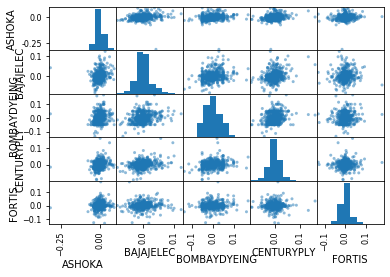

In [357]:
scatter_matrix(sctrp)
plt.show()

In [370]:
x1=stcc["FORTIS"].rolling(7).mean().dropna()

In [371]:
y1=stcc["FORTIS"].rolling(7).std().dropna()

In [372]:
y2=stcc["FORTIS"].rolling(7).std().dropna()*np.sqrt(7)

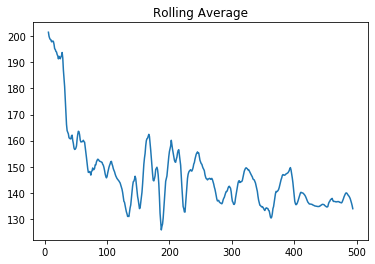

In [373]:
plt.plot(x1)
plt.title("Rolling Average")
plt.show()

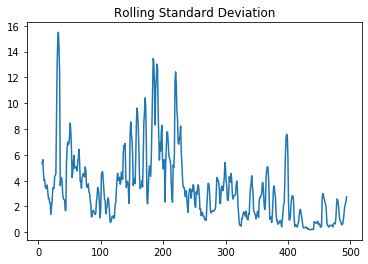

In [374]:
plt.plot(y1)
plt.title("Rolling Standard Deviation")
plt.show()

In [334]:
nift=pd.read_csv("Nifty50.csv")

In [294]:
nift.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [293]:
nift["Date"].astype("datetime64")

0     2017-05-15
1     2017-05-16
2     2017-05-17
3     2017-05-18
4     2017-05-19
         ...    
489   2019-05-07
490   2019-05-08
491   2019-05-09
492   2019-05-10
493   2019-05-13
Name: Date, Length: 494, dtype: datetime64[ns]

In [295]:
nift["Close"]

0       9445.40
1       9512.25
2       9525.75
3       9429.45
4       9427.90
         ...   
489    11497.90
490    11359.45
491    11301.80
492    11278.90
493    11148.20
Name: Close, Length: 494, dtype: float64

In [376]:
nift['Volatility']=nift["Close"].rolling(7).std().dropna()*np.sqrt(7)

In [394]:
nift.dropna().head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Volatility
6,23-May-2017,9445.05,9448.05,9370.00,9386.15,231345629,11553.27,131.078637
7,24-May-2017,9410.90,9431.90,9341.65,9360.55,218265181,11045.95,160.375645
8,25-May-2017,9384.05,9523.30,9379.20,9509.75,298147347,16964.26,159.076677
9,26-May-2017,9507.75,9604.90,9495.40,9595.10,225647631,11204.36,209.860543
10,29-May-2017,9560.05,9637.75,9547.70,9604.90,242266034,12484.61,258.027130


In [379]:
tc=stcc["FORTIS"].rolling(21).mean().dropna()

In [380]:
st=stcc["FORTIS"].rolling(34).mean().dropna()

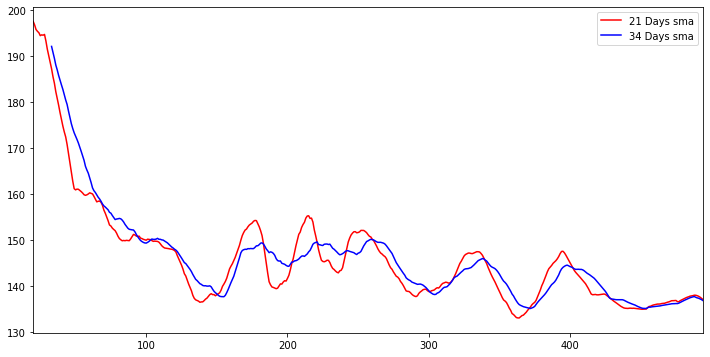

In [381]:
tc.plot(label='21 Days sma',color='red',figsize=(12,6))
st.plot(label='34 Days sma',color='blue',figsize=(12,6))
plt.legend()

In [383]:
day_14ma=stcc["FORTIS"].rolling(14).mean().dropna()#14days rolling mean

In [384]:
day_14std=stcc["FORTIS"].rolling(14).std().dropna()#14days rolling sd

In [387]:
upr=day_14ma+(day_14std*2)
lowr=day_14ma-(day_14std*2)

In [395]:
avgp=stc5["Average Price"]

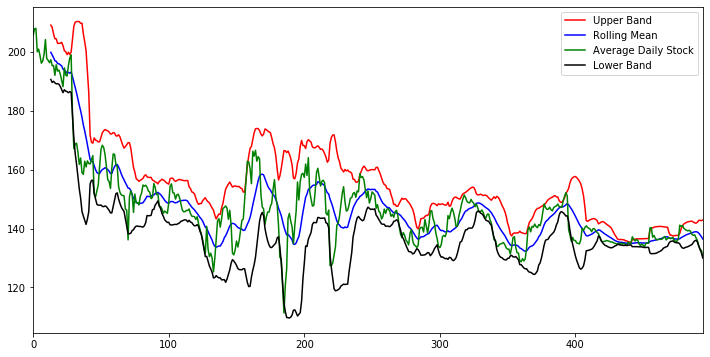

In [396]:
upr.plot(label='Upper Band',color='red',figsize=(12,6))
day_14ma.plot(label='Rolling Mean',color='blue',figsize=(12,6))
avgp.plot(label='Average Daily Stock',color='green',figsize=(12,6))
lowr.plot(label='Lower Band',color='black',figsize=(12,6))                                                  
plt.legend()